In [3]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [258]:
df_PP = pd.read_csv('peerParticipants.csv', keep_default_na=False)
df_MP = pd.read_csv('mgmtPublics.csv', keep_default_na=False)
df_MF = pd.read_csv('mgmtFacilities.csv', keep_default_na=False)

In [265]:
df_MF

,id,approved,name,type,website,clli,rencode,npanxx,address1,address2,city,state,zipcode,country,notes
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,Ashburn,VA,20147-6205,US,
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,,415-822,200 Paul Ave,,San Francisco,CA,94110,US,
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,,212-785,25 Broadway,,New York,NY,10004-1010,US,
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,Dallas,TX,75207-3137,US,
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,,Palo Alto,CA,94301-1704,US,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,2487,Y,TelecityGroup Warsaw (PLIX),TelecityGroup,http://www.telecitygroup.com/european-data-cen...,,,,Al. Jerozolimskie 65/79,,Warszawa,,00-697,PL,
1885,2488,Y,System-Net HDC 1,System-Net,,,,,125 rue de la sariette,,Saint Aunes,,34130,FR,
1886,2489,Y,Webmasters Lda Datacenter,Webmasters Lda Datacenter,http://www.domains.co.mz,,,,Av.Malhangalene 787 1st Floor,,Maputo,,,MZ,
1887,2490,N,Poznan University of Economics,Poznan University of Economics,http://www.ue.poznan.pl/,,,,PowstaÅ„cÃ³w Wielkopolskich 16,,Poznan,,61-895,PL,


In [266]:
df_merge = pd.merge(left=df_MF,right=df_MP, how='outer', left_on='id', right_on='id')
#df_merge.to_csv('check.csv')


In [324]:
df_merge_all = pd.merge(left=df_merge,right=df_PP, how='outer', left_on='id', right_on='id')
df_merge_all.to_csv('New_Master.csv')
df_merge_all

,id,approved_x,name_x,type,website_x,clli,rencode,npanxx,address1,address2,...,info_ipv6,policy_url,policy_general,policy_locations,policy_ratio,policy_contracts,policy_nopublic,policy_noprivate,date_created,date_lastupdated
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,...,1,http://www.gtt.net/peering/,Restrictive,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2014-06-13 11:36:43
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,,415-822,200 Paul Ave,,...,1,,Open,Not Required,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-22 13:49:31
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,,212-785,25 Broadway,,...,,http://peering.dal.net,Open,Preferred,No,Not Required,N,N,2004-07-28 00:00:00,2015-01-23 15:40:44
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,...,1,http://www.as22822.net/,Selective,Required - US,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-30 16:41:06
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,,...,1,https://extranet-es.swisscom.com/ipplus/doc/BI...,Selective,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2015-12-15 08:47:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,9301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2015-12-31 13:51:16,
9083,9302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2015-12-31 19:58:17,
9084,9303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2016-01-01 10:57:37,
9085,9304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2016-01-02 00:09:57,


In [325]:
len(df_merge_all['asn'].unique())

5630

In [326]:
df_merge_all = df_merge_all.replace([np.nan, ''], 0)
df_merge_all.asn

0        4436
1       20940
2       31800
3       22822
4        3303
        ...  
9082        0
9083        0
9084        0
9085        0
9086        0
Name: asn, Length: 9087, dtype: object

In [330]:
x = df_merge_all["asn"] != 0
df_master = df_merge_all[x]
df_master

,id,approved_x,name_x,type,website_x,clli,rencode,npanxx,address1,address2,...,info_ipv6,policy_url,policy_general,policy_locations,policy_ratio,policy_contracts,policy_nopublic,policy_noprivate,date_created,date_lastupdated
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,...,1,http://www.gtt.net/peering/,Restrictive,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2014-06-13 11:36:43
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,0,415-822,200 Paul Ave,0,...,1,0,Open,Not Required,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-22 13:49:31
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,0,212-785,25 Broadway,0,...,0,http://peering.dal.net,Open,Preferred,No,Not Required,N,N,2004-07-28 00:00:00,2015-01-23 15:40:44
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,...,1,http://www.as22822.net/,Selective,Required - US,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-30 16:41:06
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,0,...,1,https://extranet-es.swisscom.com/ipplus/doc/BI...,Selective,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2015-12-15 08:47:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9070,9289,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Private Only,N,N,2015-12-26 19:08:41,2015-12-31 11:52:34
9072,9291,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-28 09:13:21,2015-12-30 06:29:08
9073,9292,0,0,0,0,0,0,0,0,0,...,0,0,Selective,Not Required,No,0,N,N,2015-12-28 14:02:09,2015-12-28 16:04:14
9078,9297,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-29 21:44:03,2015-12-31 13:39:24


Text(0.5, 1.0, 'Table of Different Label Counts')

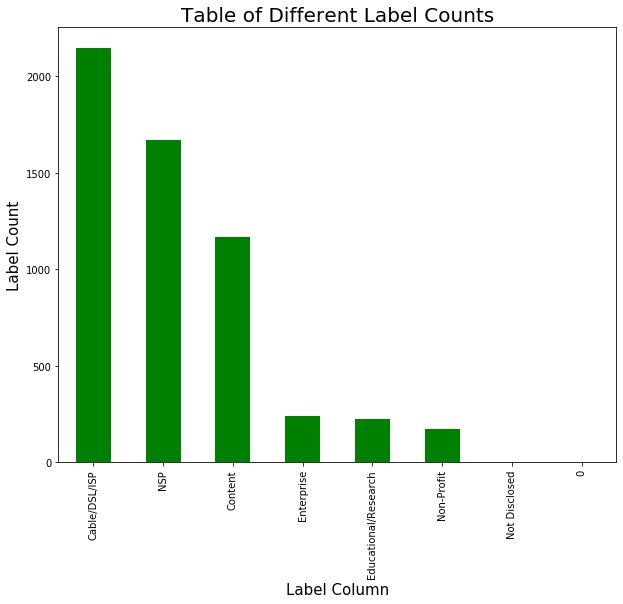

In [333]:
df_label = df_master['info_type']
plt.figure(figsize=[10,8])
df_label.value_counts().plot(kind='bar', color = 'g')
plt.xlabel('Label Column', fontsize = 15)
plt.ylabel('Label Count', fontsize = 15)
plt.title('Table of Different Label Counts', fontsize = 20)

In [338]:
xdf = df_master[~df_master['info_traffic'].isin(['Not Disclosed', 0])]
xdf

,id,approved_x,name_x,type,website_x,clli,rencode,npanxx,address1,address2,...,info_ipv6,policy_url,policy_general,policy_locations,policy_ratio,policy_contracts,policy_nopublic,policy_noprivate,date_created,date_lastupdated
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,...,1,http://www.gtt.net/peering/,Restrictive,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2014-06-13 11:36:43
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,0,415-822,200 Paul Ave,0,...,1,0,Open,Not Required,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-22 13:49:31
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,0,212-785,25 Broadway,0,...,0,http://peering.dal.net,Open,Preferred,No,Not Required,N,N,2004-07-28 00:00:00,2015-01-23 15:40:44
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,...,1,http://www.as22822.net/,Selective,Required - US,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-30 16:41:06
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,0,...,1,https://extranet-es.swisscom.com/ipplus/doc/BI...,Selective,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2015-12-15 08:47:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9285,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-25 16:47:42,2015-12-26 15:50:41
9070,9289,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Private Only,N,N,2015-12-26 19:08:41,2015-12-31 11:52:34
9072,9291,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-28 09:13:21,2015-12-30 06:29:08
9078,9297,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-29 21:44:03,2015-12-31 13:39:24


In [339]:
x = xdf['info_traffic'].to_numpy()
x[0:3]

array(['1 Tbps+', '1 Tbps+', '100-1000Mbps'], dtype=object)

In [340]:
#drop the non disclosed and blank rows first
col = []
cnt = 0
for i in x:
    cnt += 1
    num = []
#     if isinstance(i, int):
#         print(i, type(i))
#         break
    for d in i:
        if d.isalpha(): 
            if d == 'T':
                col.append(int(i[0])*1e+12)
                break
        if d.isalpha() == False:
            if d == '+':
                k = ''.join(num).split('+')
                col.append(int(k[0])*1e+11)
                break
            num.append(d)
            k = ''.join(num).split('-')  
        if d.isalpha(): 
            act = (int(k[0])+int(k[1]))/2
            if d == 'G':
                col.append(act*1e+9)
            if d == 'M':
                col.append(act*1e+6)
            
                
    #if cnt == 7:
     #   break



In [345]:
xdf['info_traffic'] = col

C:\Users\DREADBORN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       1.000000e+12
1       1.000000e+12
2       5.500000e+08
3       1.000000e+12
4       7.500000e+11
            ...     
9066    5.500000e+08
9070    7.500000e+09
9072    3.500000e+10
9078    3.000000e+09
9079    1.000000e+07
Name: info_traffic, Length: 4229, dtype: float64

In [364]:
df_ip_prefix = df_master['info_prefixes']
df_info_traffic = xdf['info_traffic']

In [372]:
df_ip_prefix

0       11000
1          50
2           3
3         600
4        3000
        ...  
9070      150
9072       75
9073        0
9078        0
9079        0
Name: info_prefixes, Length: 5628, dtype: object

In [ ]:
#-------------------------------------------------
# above is a different method, using python merge (outer) to join the csv's
# into 1 dataset, drop all rows that had blank AS #'s
#-------------------------------------------------

In [89]:
df = pd.read_csv('master.csv', na_filter= False, index_col=None, header=0, low_memory=False, error_bad_lines=False)
df

,id,asn_peer_participants,name_peer_participants,aka_peer_participants,website_peer_participants,notes_public_peer_participants,notes_private_peer_participants,irr_as_set_peer_participants,info_traffic_peer_participants,info_ratio_peer_participants,...,avail_sonet_peer_participants_privates,avail_ethernet_peer_participants_privates,avail_atm_peer_participants_privates,participant_id_peer_participants_publics,public_id_peer_participants_publics,local_asn_peer_participants_publics,local_ipaddr_peer_participants_publics,speed_peer_participants_publics,protocol_peer_participants_publics,pending_peer_participants_publics
0,1,4436,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,,,,,,,,,,
1,2,20940,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,,,,,,,,,,
2,3,31800,DALnet IRC Network,,http://www.dal.net,,,AS31800,100-1000Mbps,Heavy Inbound,...,,,,,,,,,,
3,4,22822,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,,,AS-LLNW,1 Tbps+,Mostly Outbound,...,,,,,,,,,,
4,5,3303,Swisscom,IP-Plus,http://www.ip-plus.net,,,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,,,,,,,,,,
5,6,22773,Cox Communications,,www.cox.com/peering,,,AS22773,100+ Gbps,Mostly Inbound,...,,,,,,,,,,
6,7,6079,RCN,,http://www.rcn.com/,"Closest-exit by default, best-exit done via ag...",Many private locations available within our me...,AS-RCN,20-50 Gbps,Balanced,...,,,,,,,,,,
7,8,23148,Verizon Cloud,,www.verizon.com,Please contact as23148peeringsupport@verizon.c...,,AS-TWW,Not Disclosed,Balanced,...,,,,,,,,,,
8,9,7843,Time Warner Cable,TWC,,IPv4 Maxpfx: 10000\nIPv6 Maxpfx: 200,,AS-ROADRUNNER,1 Tbps+,Balanced,...,,,,,,,,,,
9,10,1299,TeliaSonera International Carrier,"Telia, Sonera, TSIC",http://www.teliasoneraic.com/,,,AS-TELIANET / AS-TELIANET-V6,1 Tbps+,Balanced,...,,,,,,,,,,


In [54]:
#file = df.apply(pd.to_numeric, errors='coerce').replace([np.nan, np.inf, -np.inf], 0).clip(lower=0)
df['asn_peer_participants']

0         4436
1        20940
2        31800
3        22822
4         3303
5        22773
6         6079
7        23148
8         7843
9         1299
10        7132
11        2828
12        3257
13        3265
14        2818
15       19165
16       63311
17       64597
18       12200
19        4766
20       19817
21        6066
22        8002
23       10310
24       19029
25        5410
26       10255
27        6762
28        6320
29        8001
         ...  
33448         
33449         
33450         
33451         
33452         
33453         
33454         
33455         
33456         
33457         
33458         
33459         
33460         
33461         
33462         
33463         
33464         
33465         
33466         
33467         
33468         
33469         
33470         
33471         
33472         
33473         
33474         
33475         
33476         
33477         
Name: asn_peer_participants, Length: 33478, dtype: object

In [55]:
#how many unique AS's are there? 
len(df['asn_peer_participants'].unique())


5886

In [233]:
df.loc[[int(input())],['info_type_peer_particpiants','city_mgmt_facility', 
                 'state_mgmt_facility', 'zipcode_mgmt_facility' ]]

4436


,info_type_peer_particpiants,city_mgmt_facility,state_mgmt_facility,zipcode_mgmt_facility
4436,Cable/DSL/ISP,,,


In [53]:
#CDF of ip refixes for content, Non-profit and NSP. 

In [96]:
df = df.replace([np.nan], 0)
df

,id,asn_peer_participants,name_peer_participants,aka_peer_participants,website_peer_participants,notes_public_peer_participants,notes_private_peer_participants,irr_as_set_peer_participants,info_traffic_peer_participants,info_ratio_peer_participants,...,avail_sonet_peer_participants_privates,avail_ethernet_peer_participants_privates,avail_atm_peer_participants_privates,participant_id_peer_participants_publics,public_id_peer_participants_publics,local_asn_peer_participants_publics,local_ipaddr_peer_participants_publics,speed_peer_participants_publics,protocol_peer_participants_publics,pending_peer_participants_publics
0,1,4436,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,,,,,,,,,,
1,2,20940,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,,,,,,,,,,
2,3,31800,DALnet IRC Network,,http://www.dal.net,,,AS31800,100-1000Mbps,Heavy Inbound,...,,,,,,,,,,
3,4,22822,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,,,AS-LLNW,1 Tbps+,Mostly Outbound,...,,,,,,,,,,
4,5,3303,Swisscom,IP-Plus,http://www.ip-plus.net,,,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,,,,,,,,,,
5,6,22773,Cox Communications,,www.cox.com/peering,,,AS22773,100+ Gbps,Mostly Inbound,...,,,,,,,,,,
6,7,6079,RCN,,http://www.rcn.com/,"Closest-exit by default, best-exit done via ag...",Many private locations available within our me...,AS-RCN,20-50 Gbps,Balanced,...,,,,,,,,,,
7,8,23148,Verizon Cloud,,www.verizon.com,Please contact as23148peeringsupport@verizon.c...,,AS-TWW,Not Disclosed,Balanced,...,,,,,,,,,,
8,9,7843,Time Warner Cable,TWC,,IPv4 Maxpfx: 10000\nIPv6 Maxpfx: 200,,AS-ROADRUNNER,1 Tbps+,Balanced,...,,,,,,,,,,
9,10,1299,TeliaSonera International Carrier,"Telia, Sonera, TSIC",http://www.teliasoneraic.com/,,,AS-TELIANET / AS-TELIANET-V6,1 Tbps+,Balanced,...,,,,,,,,,,


In [98]:
df_content = df.loc[df['info_type_peer_participants'] == 'Content']
df_non_profit = df.loc[df['info_type_peer_participants'] == 'Non-Profit']
df_nsp = df.loc[df['info_type_peer_participants'] == 'NSP']

In [99]:
df_nsp = df_nsp['info_prefixes_peer_participants']
df_non_profit = df_non_profit['info_prefixes_peer_participants']
df_content = df_content['info_prefixes_peer_participants']

In [100]:
df_nsp

0        11000
7          500
9       260000
11            
12      165000
24         350
27       53000
28          70
29         500
30        3000
31           1
33       25000
34      125000
35        1722
36          50
37        1600
38            
39         500
40          30
44        3000
52       37500
54          20
57         200
58            
60         500
63        4900
67       16000
68        2000
70          10
71          10
         ...  
5798        60
5803        25
5809         1
5810        75
5813       150
5817          
5829       500
5831        10
5835         4
5836         1
5840         4
5846       100
5854         5
5856        10
5864        30
5866       400
5873         8
5881        20
5890    120000
5908        20
5910          
5929          
5942          
5949        30
5953         1
5964        10
5965          
5985          
6012         3
6017          
Name: info_prefixes_peer_participants, Length: 1734, dtype: object

AttributeError: 'str' object has no attribute 'log'

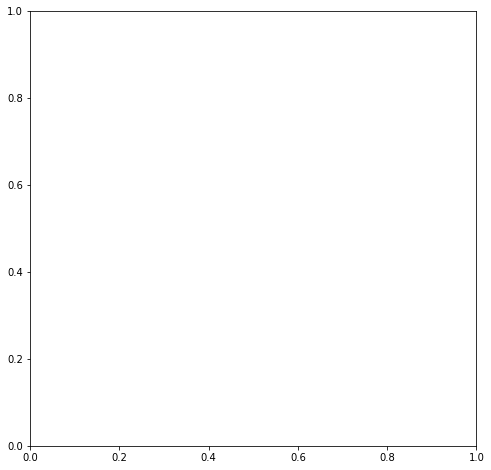

In [101]:
f, ax =plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(np.log(df_content), label = "Content", cumulative=True)
ax = sns.kdeplot(np.log(df_non_profit), label = "Non-Profit", cumulative=True)
ax = sns.kdeplot(np.log(df_nsp), label = "NSP", cumulative=True)
ax.legend()
plt.xlabel('IP prefixes (log)')
plt.ylabel('Cumulative fraction IP prefixes')
plt.title('Distribution of Ip prefixes for content, nonprofit and NSP')

In [66]:
df = df[~df['info_traffic_peer_participants'].isin(['Not Disclosed', 0, ''])]
#xdf = df[ df['info_traffic_peer_participants'] != '']
df

,id,asn_peer_participants,name_peer_participants,aka_peer_participants,website_peer_participants,notes_public_peer_participants,notes_private_peer_participants,irr_as_set_peer_participants,info_traffic_peer_participants,info_ratio_peer_participants,...,avail_sonet_peer_participants_privates,avail_ethernet_peer_participants_privates,avail_atm_peer_participants_privates,participant_id_peer_participants_publics,public_id_peer_participants_publics,local_asn_peer_participants_publics,local_ipaddr_peer_participants_publics,speed_peer_participants_publics,protocol_peer_participants_publics,pending_peer_participants_publics
0,1,4436,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,,,,,,,,,,
1,2,20940,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,,,,,,,,,,
2,3,31800,DALnet IRC Network,,http://www.dal.net,,,AS31800,100-1000Mbps,Heavy Inbound,...,,,,,,,,,,
3,4,22822,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,,,AS-LLNW,1 Tbps+,Mostly Outbound,...,,,,,,,,,,
4,5,3303,Swisscom,IP-Plus,http://www.ip-plus.net,,,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,,,,,,,,,,
5,6,22773,Cox Communications,,www.cox.com/peering,,,AS22773,100+ Gbps,Mostly Inbound,...,,,,,,,,,,
6,7,6079,RCN,,http://www.rcn.com/,"Closest-exit by default, best-exit done via ag...",Many private locations available within our me...,AS-RCN,20-50 Gbps,Balanced,...,,,,,,,,,,
8,9,7843,Time Warner Cable,TWC,,IPv4 Maxpfx: 10000\nIPv6 Maxpfx: 200,,AS-ROADRUNNER,1 Tbps+,Balanced,...,,,,,,,,,,
9,10,1299,TeliaSonera International Carrier,"Telia, Sonera, TSIC",http://www.teliasoneraic.com/,,,AS-TELIANET / AS-TELIANET-V6,1 Tbps+,Balanced,...,,,,,,,,,,
10,12,7132,AT&T US - AS7132,"ATTIS, SBC Internet Services, SBCNT",http://www.att.com,No longer peering due to consolidation into AT...,"GigE/10GigE, OC192 options",AS-SBCIS-7132,100+ Gbps,Mostly Inbound,...,0,1,0,,,,,,,


In [68]:
x = df['info_traffic_peer_participants'].to_numpy()
x[0:3]

array(['1 Tbps+', '1 Tbps+', '100-1000Mbps'], dtype=object)

In [69]:
#drop the non disclosed and blank rows first
col = []
cnt = 0
for i in x:
    cnt += 1
    num = []
#     if isinstance(i, int):
#         print(i, type(i))
#         break
    for d in i:
        if d.isalpha(): 
            if d == 'T':
                col.append(int(i[0])*1e+12)
                break
        if d.isalpha() == False:
            if d == '+':
                k = ''.join(num).split('+')
                col.append(int(k[0])*1e+11)
                break
            num.append(d)
            k = ''.join(num).split('-')  
        if d.isalpha(): 
            act = (int(k[0])+int(k[1]))/2
            if d == 'G':
                col.append(act*1e+9)
            if d == 'M':
                col.append(act*1e+6)
            
                
    #if cnt == 7:
     #   break



In [74]:
col

[1000000000000.0,
 1000000000000.0,
 550000000.0,
 1000000000000.0,
 750000000000.0,
 10000000000000.0,
 35000000000.0,
 1000000000000.0,
 1000000000000.0,
 10000000000000.0,
 1000000000000.0,
 1000000000000.0,
 75000000000.0,
 35000000000.0,
 35000000000.0,
 10000000.0,
 150000000000.0,
 1000000000000.0,
 3000000000.0,
 10000000.0,
 10000000000000.0,
 3000000000.0,
 750000000000.0,
 10000000.0,
 1000000000000.0,
 3000000000.0,
 15000000000.0,
 10000000.0,
 60000000.0,
 400000000000.0,
 1000000000000.0,
 750000000000.0,
 550000000.0,
 150000000000.0,
 10000000000000.0,
 15000000000.0,
 250000000000.0,
 550000000.0,
 7500000000.0,
 250000000000.0,
 400000000000.0,
 15000000000.0,
 150000000000.0,
 35000000000.0,
 550000000.0,
 3000000000.0,
 1000000000000.0,
 10000000.0,
 3000000000.0,
 7500000000.0,
 750000000000.0,
 60000000.0,
 3000000000.0,
 750000000000.0,
 35000000000.0,
 550000000.0,
 1000000000000.0,
 1000000000000.0,
 35000000000.0,
 3000000000.0,
 1000000000000.0,
 25000000000

In [75]:
df['info_traffic_peer_participants'] = col
df.head(10)

,id,asn_peer_participants,name_peer_participants,aka_peer_participants,website_peer_participants,notes_public_peer_participants,notes_private_peer_participants,irr_as_set_peer_participants,info_traffic_peer_participants,info_ratio_peer_participants,...,avail_ethernet_peer_participants_privates,avail_atm_peer_participants_privates,participant_id_peer_participants_publics,public_id_peer_participants_publics,local_asn_peer_participants_publics,local_ipaddr_peer_participants_publics,speed_peer_participants_publics,protocol_peer_participants_publics,pending_peer_participants_publics,info_traffic_peer_particpiants
0,1,4436,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1.000000e+12,Mostly Outbound,...,,,,,,,,,,1.000000e+12
1,2,20940,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,,AS-AKAMAI,1.000000e+12,Heavy Outbound,...,,,,,,,,,,1.000000e+12
2,3,31800,DALnet IRC Network,,http://www.dal.net,,,AS31800,5.500000e+08,Heavy Inbound,...,,,,,,,,,,5.500000e+08
3,4,22822,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,,,AS-LLNW,1.000000e+12,Mostly Outbound,...,,,,,,,,,,1.000000e+12
4,5,3303,Swisscom,IP-Plus,http://www.ip-plus.net,,,AS-SWCMGLOBAL,7.500000e+11,Mostly Inbound,...,,,,,,,,,,7.500000e+11
5,6,22773,Cox Communications,,www.cox.com/peering,,,AS22773,1.000000e+13,Mostly Inbound,...,,,,,,,,,,1.000000e+13
6,7,6079,RCN,,http://www.rcn.com/,"Closest-exit by default, best-exit done via ag...",Many private locations available within our me...,AS-RCN,3.500000e+10,Balanced,...,,,,,,,,,,3.500000e+10
8,9,7843,Time Warner Cable,TWC,,IPv4 Maxpfx: 10000\nIPv6 Maxpfx: 200,,AS-ROADRUNNER,1.000000e+12,Balanced,...,,,,,,,,,,1.000000e+12
9,10,1299,TeliaSonera International Carrier,"Telia, Sonera, TSIC",http://www.teliasoneraic.com/,,,AS-TELIANET / AS-TELIANET-V6,1.000000e+12,Balanced,...,,,,,,,,,,1.000000e+12
10,12,7132,AT&T US - AS7132,"ATTIS, SBC Internet Services, SBCNT",http://www.att.com,No longer peering due to consolidation into AT...,"GigE/10GigE, OC192 options",AS-SBCIS-7132,1.000000e+13,Mostly Inbound,...,1,0,,,,,,,,1.000000e+13


In [85]:
df_cable = df.loc[df['info_type_peer_participants'] == 'Cable/DSL/ISP']
df_edu = df.loc[df['info_type_peer_participants'] == 'Educational/Research']
df_ent = df.loc[df['info_type_peer_participants'] == 'Enterprise']

In [86]:
df_cable = df_cable['info_traffic_peer_participants']
df_edu = df_edu['info_traffic_peer_participants']
df_ent = df_ent['info_traffic_peer_participants']

In [87]:
df_ent

73      3.000000e+09
141     5.500000e+08
247     6.000000e+07
310     5.500000e+08
354     5.500000e+08
434     1.000000e+07
460     6.000000e+07
629     1.000000e+07
648     6.000000e+07
676     3.500000e+10
681     6.000000e+07
837     5.500000e+08
876     6.000000e+07
902     6.000000e+07
1077    5.500000e+08
1183    7.500000e+09
1213    3.000000e+09
1229    1.000000e+07
1277    5.500000e+08
1357    5.500000e+08
1410    5.500000e+08
1442    3.000000e+09
1481    3.500000e+10
1486    1.000000e+07
1543    6.000000e+07
1716    6.000000e+07
1741    5.500000e+08
1843    3.000000e+09
1870    3.000000e+09
1950    1.000000e+07
            ...     
5277    5.500000e+08
5336    6.000000e+07
5352    5.500000e+08
5370    3.000000e+09
5430    6.000000e+07
5435    5.500000e+08
5485    5.500000e+08
5494    7.500000e+09
5505    3.000000e+09
5551    5.500000e+08
5572    5.500000e+08
5581    1.500000e+11
5582    6.000000e+07
5606    6.000000e+07
5607    3.500000e+10
5626    7.500000e+09
5627    5.500

ImportError: Cumulative distributions are currentlyonly implemented in statsmodels.Please install statsmodels.

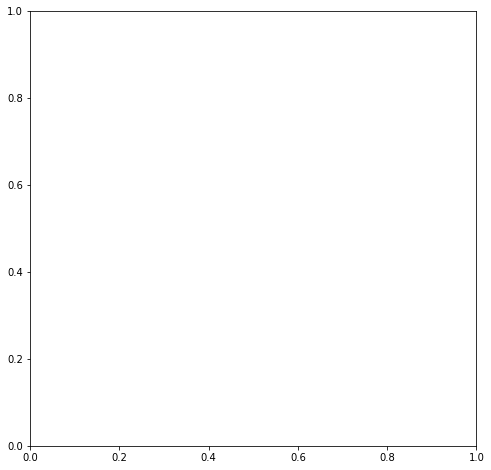

In [88]:
f, ax =plt.subplots(figsize=(8, 8))
#np.log
ax = sns.kdeplot(np.log(df_content), label = "Content", cumulative=True)
ax = sns.kdeplot(np.log(df_non_profit), label = "Non-Profit", cumulative=True)
ax = sns.kdeplot(np.log(df_nsp), label = "NSP", cumulative=True)
ax.legend()
plt.xlabel('Traffic spped (log)')
plt.ylabel('Cumulative fraction of traffic speeds')
plt.title('Distribution of Traffix speeds for content, nonprofit and NSP')

In [15]:
df = pd.read_csv('master.csv', keep_default_na=False)

c:\users\dante valentine\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (74,75,76,78,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
len(df['info_type_peer_participants'].unique())

7

In [21]:
df = df[~df['info_type_peer_participants'].isin([''])]

In [22]:
df['info_type_peer_participants']

0                        NSP
1                    Content
2                 Non-Profit
3                    Content
4              Cable/DSL/ISP
5              Cable/DSL/ISP
6              Cable/DSL/ISP
7                        NSP
8              Cable/DSL/ISP
9                        NSP
10             Cable/DSL/ISP
11                       NSP
12                       NSP
13             Cable/DSL/ISP
14                   Content
15             Cable/DSL/ISP
16                   Content
17      Educational/Research
18                   Content
19             Cable/DSL/ISP
20             Cable/DSL/ISP
21      Educational/Research
22             Cable/DSL/ISP
23                   Content
24                       NSP
25             Cable/DSL/ISP
26             Cable/DSL/ISP
27                       NSP
28                       NSP
29                       NSP
                ...         
6004           Not Disclosed
6005           Not Disclosed
6006           Cable/DSL/ISP
6007          

Text(0.5, 1.0, 'Table of Different Label Counts')

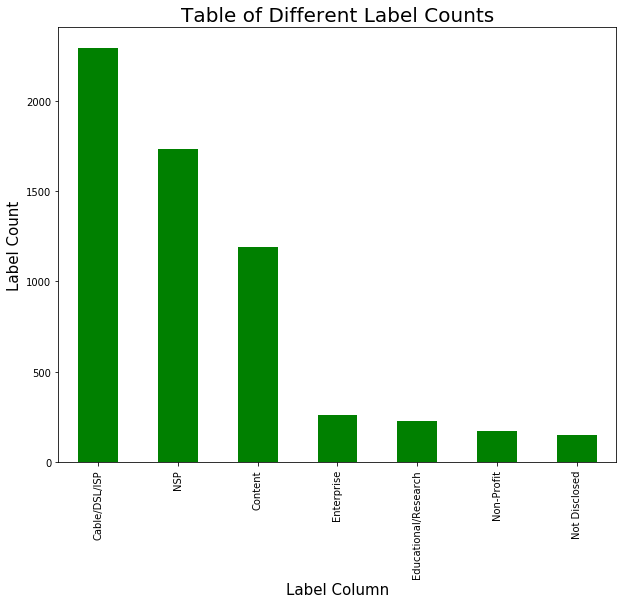

In [23]:
df_label = df['info_type_peer_participants']
plt.figure(figsize=[10,8])
df_label.value_counts().plot(kind='bar', color = 'g')
plt.xlabel('Label Column', fontsize = 15)
plt.ylabel('Label Count', fontsize = 15)
plt.title('Table of Different Label Counts', fontsize = 20)

In [26]:
df['info_prefixes_peer_participants'] = df['info_prefixes_peer_participants'].replace([''], 0)
df['info_prefixes_peer_participants']

0        11000
1           50
2            3
3          600
4         3000
5            0
6         2500
7          500
8         7000
9       260000
10        2900
11           0
12      165000
13          42
14           7
15          15
16          20
17           0
18         150
19       20000
20          69
21           2
22           0
23         500
24         350
25          30
26          10
27       53000
28          70
29         500
         ...  
6004         0
6005         0
6006         0
6007         0
6008         0
6009         0
6010         0
6011         0
6012         3
6013         5
6014        35
6015         0
6016         0
6017         0
6018         0
6019         0
6020         0
6021         0
6022         0
6023         0
6024         0
6025         0
6026         0
6027         0
6028         0
6029         0
6030         0
6031         0
6032         0
6033         0
Name: info_prefixes_peer_participants, Length: 6033, dtype: object

In [49]:
df_type_prefix = df[['info_prefixes_peer_participants', 'info_type_peer_participants']]
df_type_prefix

,info_prefixes_peer_participants,info_type_peer_participants
0,11000,NSP
1,50,Content
2,3,Non-Profit
3,600,Content
4,3000,Cable/DSL/ISP
5,0,Cable/DSL/ISP
6,2500,Cable/DSL/ISP
7,500,NSP
8,7000,Cable/DSL/ISP
9,260000,NSP


In [50]:
df_type_prefix.plot()

TypeError: Empty 'DataFrame': no numeric data to plot